# <center> Project: Visualizing Real World Data

## <center> Health decline in post-Soviet Union countries in relation to nutrition, smoking and alcohol consumption 

### <center> Part: Data analysis 

###### <center> Kamila Kutz-Cerri, Ironhack Data Analytics Bootcamp, Berlin, Autumn 2019 </center>

## <center> Data description </center>
Source: http://www.euro.who.int/en/data-and-evidence/archive/european-health-for-all-database-hfa-db

Data cleaning part in Data Cleaning.ipynb

#### 1. Project description

While citizens of the Soviet Union were entitled to free universal healthcare, the nation's health care system was plagued by underfunding, deteriorating facilities and outdated equipment. Soviet citizens were deprived of their personal freedom and subjected to intense political pressure, which in turn increased stress and suicide rates. Problems stemming from the end of the Soviet era, including alcoholism, high tobacco consumption and unhealthy diet spilled over in the 90s, leading to dramatic deterioration in health, with increasing death rates and decrease in life expectancy. This analysis focuses on finding a relation between chosen disease-caused morbidity and nutrition, smoking and alcohol consumption

#### 2. Data description
- code: object:  measured parameter, detailed information in 'description' column
- sex: object:  'female', 'male' , 'all'
- country: object:  country in ISO 3166 ALPHA-3
- year: : integer: year
- value : float: measured value, detailed information in 'description' column
- description: object: decription of the measured parameter
- east west: object: 'east' corresponds to the post-Soviet Union countries and Poland, 'west' to the rest of Europe, as described in data_cleaning.ipynb

#### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline
sns.set_palette('Set2')
sns.set_style('white')
palette ={"east":"lightseagreen","west":'coral'}

#### Loading the data

In [2]:
df = pd.read_csv('hfa_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928583 entries, 0 to 928582
Data columns (total 7 columns):
code           928583 non-null object
sex            928583 non-null object
country        928583 non-null object
year           928583 non-null int64
value          928583 non-null float64
description    928583 non-null object
east west      928583 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 49.6+ MB


##  <center> Functions </center>

#### Search the dataframe by 3 strings
- Returns an array with 'code' and 'description' 

In [3]:
def find_data(df, string, string2, string3):    
    code = df.loc[(df['description'].str.contains(string)
                  &df['description'].str.contains(string2)
                  &df['description'].str.contains(string3))]['code'].unique()
    desc = df[df['code'].isin(code)]['description'].unique()
    return(code+': '+ desc)

#### Plot boxplot by code for east and west

In [4]:
def plot_boxplot_by_code(df,code):
    data = df[df['code'] == code].rename(columns={'east west':' '})
    title = data['s_description'].to_list()[0]
    ylabel = data['unit'].unique()[0]
    
    data['year decade'] = (data['year'].astype(str).str[:3]+'0').astype(int)

    sns.set(rc={'figure.figsize':(10,15)})
    sns.set_style('white')

    ax = sns.boxplot(x="year decade",
                     y="value",
                     hue=' ',
                     palette=palette, 
                     data=data)
    plt.xticks(rotation=45)
    ax.set_title(title, fontsize=25)
    plt.xlabel('years')
    plt.ylabel(ylabel)
    plt.savefig(title + '.png', dpi=400)


#### Plot lineplots for east and west

In [5]:
def plot_lineplot_by_europe_part(df,code):
    sns.set_palette('Set2')
    sns.set_style('white')
    palette ={"east":"lightseagreen","west":'coral'}
    title = df[df['code'] == code]['description'].to_list()[0]
    ax = sns.lineplot(x='year',
                      y='value',
                      data=(df[df['code'] == code]
                            .rename(columns={'east west':' '})),
                      ci = None,
                      hue=' ', 
                      palette=palette)
    ax.set_title(title)   
    plt.xticks(rotation=0);

#### Plot lineplots for east and west: factor by disease

In [6]:
def plot_lineplot_year_factor_disease(df_f, df_d, code_f, code_d, title, zlabel):
    ylabel='Death rate per 100 000'
    df = pd.merge(df_f[df_f['code'] == code_f]
             , df_d[df_d['code'] == code_d]
             , on=['year', 'country', 'east west', 'sex'])
    
    sns.set_palette('Set2')
    sns.set_style('white')
    
    ax = sns.lineplot(data=df,
                      x="year", 
                      y="value_y",
                      hue='east west',
                      ci=None,
                      palette=palette)
    ax2 = ax.twinx()
    sns.lineplot(data=df,
                 x="year",
                 y="value_x",
                 hue='east west',
                 palette=palette,
                 ax=ax2,
                 ci=None,
                 legend=False)
    ax2.lines[0].set_linestyle("--")
    ax2.lines[1].set_linestyle("--")

    ax.set_title(title,fontsize=15)
    plt.xlabel('years')
    plt.ylabel('____  '+ ylabel + '\n _ _ _ ' + zlabel ,  horizontalalignment='left')
    plt.show()

### <center> Introduction : Increase in death rate in East after the end of Soviet Union vs West </center>

### Increase in death rate in East after the end of Soviet Union vs West

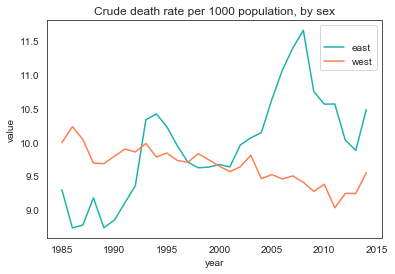

In [7]:
plot_lineplot_by_europe_part(df,'HFA_22')

## Select disease-related death data and run a stundent T-test to find parameters that are significantly dfferent between east and west population (pval 0.01 or less)

### Create a list of disease-related parameters

In [8]:
death_rates = find_data(df,'death rate', 'by sex', 'all ages').tolist()

### T-test for the significantly different parameters, saving them in significant_codes list

In [9]:
significant_codes_desc= []
for i in death_rates:
    cat1 = df.loc[((df['east west']=='east')
                  & (df['code'] == i.split(':')[0]))]
    cat2 = df.loc[((df['east west']=='west')
                  & (df['code'] == i.split(':')[0]))]
    if ttest_ind(cat1['value'], cat2['value']).pvalue  < 0.01:
        significant_codes_desc.append(i)

In [10]:
len(significant_codes_desc), len(death_rates)

(25, 26)

- Almost all of the death rate parameters are significantly different between East and West

In [11]:
nonsignificant_codes_desc= []
for i in death_rates:
    cat1 = df.loc[((df['east west']=='east')
                  & (df['code'] == i.split(':')[0]))]
    cat2 = df.loc[((df['east west']=='west')
                  & (df['code'] == i.split(':')[0]))]
    if ttest_ind(cat1['value'], cat2['value']).pvalue  > 0.01:
        nonsignificant_codes_desc.append(i)

In [12]:
nonsignificant_codes_desc

['HFA_562: Adverse effects of therapeutic agents, all ages, per 100 000, by sex (age-standardized death rate)']

- Adverse effects of therapeutic agents, all ages, per 100 000, by sex (age-standardized death rate) is the only parameter that is not significantly different between the two groups

In [13]:
death_rates

['HFA_101: Diseases of circulatory system, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_110: Ischaemic heart disease, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_119: Cerebrovascular diseases, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_128: Malignant neoplasms, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_137: Trachea/bronchus/lung cancer, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_158: External causes of injury and poisoning, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_167: Motor vehicle traffic accidents, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_176: Suicide and self-inflicted injury, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_185: Homicide and intentional injury, all ages, per 100 000, by sex (age-standardized death rate)',
 'HFA_191: Transport accidents, all ages, per 100 000, by sex (age-

### Plotting the significantly different parameters
###### 1. Converting value parameter to percentage
###### 2. Merging dataframe containg values in percentage with the original one
###### 3. Creating a list with significantly different death rates
###### 4. Creating a column with short description for the plots
###### 5. Plotting the significantly different death rate causes

In [14]:
to_perc = df.groupby(['code', 'description', 'country', 'year', 'sex', 'east west']).agg({'value': 'sum'})
df_perc = to_perc.groupby(level=0).apply(lambda x:
                              100*x / float(x.sum()))
df_perc = df_perc.reset_index()

###### 2. Merging dataframe containg values in percentage with the original one

In [15]:
df_perc = df_perc.merge(df, on=['code','description','country','year','sex', 'east west'], how='inner')
df_perc = df_perc.rename(columns={'value_y':'value',
                                  'value_x': 'value %'})

###### 3. Creating a list with significantly different death rates

In [16]:
significant_codes = [data.split(':')[0] for data in significant_codes_desc]

###### 4. Creating a column with short description for the plots

In [17]:
df_perc['short description'] = df_perc['description'].str.split(',').str[0]

###### 5. Plotting the significantly different death rate causes

''

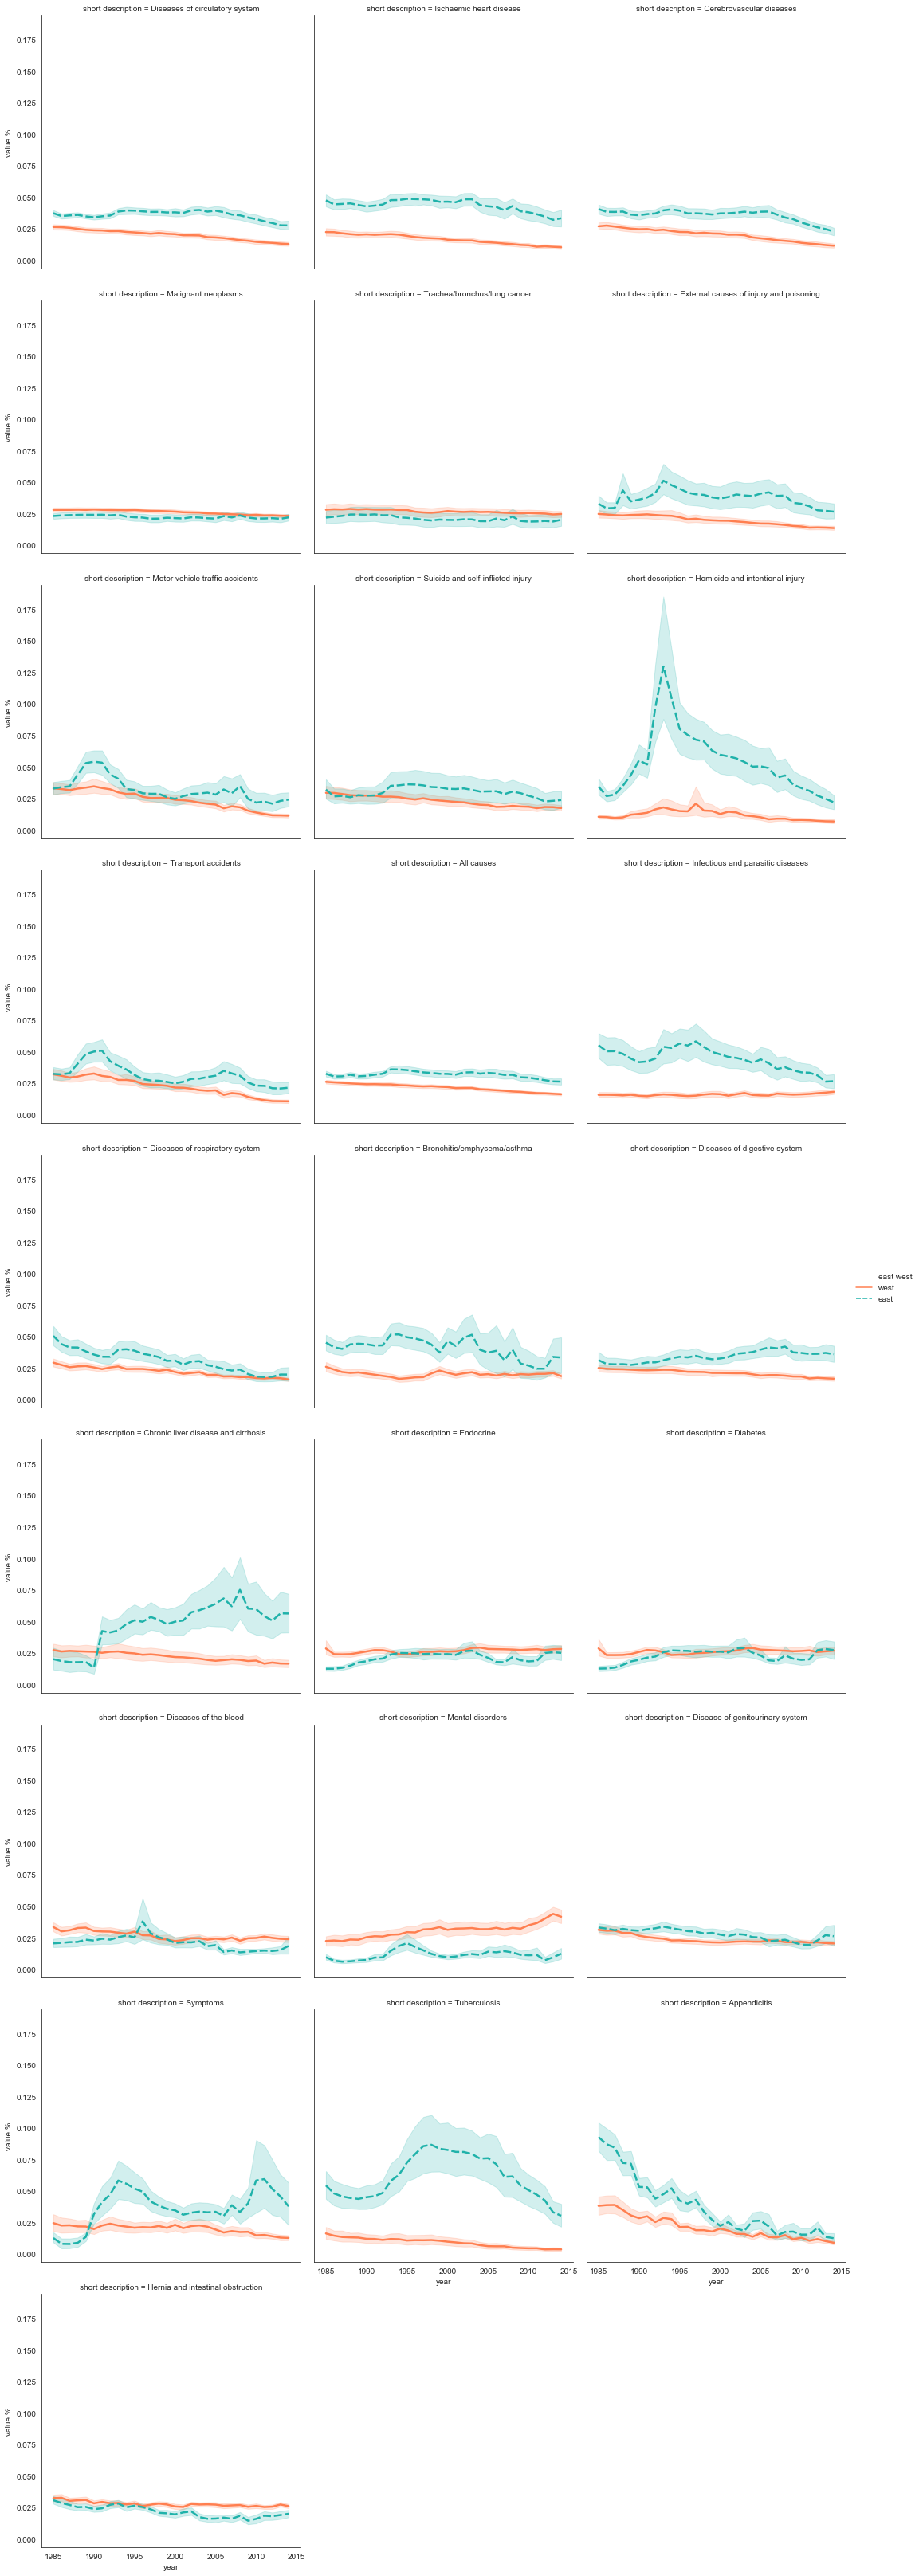

In [18]:
sns.relplot(x="year", y="value %", hue="east west", style='east west',
            col='short description', palette=palette,
            col_wrap=3, height=5, aspect=1, linewidth=2.5,
            kind="line", data=df_perc[df_perc['code'].isin(significant_codes)])
;

### Selecting diseases for comperative analysis
- 'HFA_101: Diseases of circulatory system, all ages, per 100 000, by sex (age-standardized death rate)'
- 'HFA_137: Trachea/bronchus/lung cancer, all ages, per 100 000, by sex (age-standardized death rate)'
- 'HFA_227: Diseases of digestive system, all ages, per 100 000, by sex (age-standardized death rate)'

### Selecting factors for the comperative analaysis
- Nutrition
- Smoking
- Alcohol consumption

###### 1. Find the right code
###### 2. Boxplot to visualize the differences in east and west

###### 1. Find the right code

In [19]:
(find_data(df, 'fruit', '', ''),
 find_data(df, 'alcohol', '', ''),
 find_data(df, 'cigarette', '', ''))

(array(['HFA_446: Average amount of fruits and vegetables available per person per year (kg)'],
       dtype=object),
 array(['HFA_293: Selected alcohol-related causes, per 100 000, by sex (age-standardized death rate)',
        'HFA_294: Selected alcohol-related causes, per 100 000, males (age-standardized death rate)',
        'HFA_295: Selected alcohol-related causes, per 100 000, females (age-standardized death rate)',
        'HFA_389: Incidence of alcoholic psychosis per 100 000',
        'HFA_390: Number of new cases of alcoholic psychosis',
        'HFA_426: Pure alcohol consumption, litres per capita, age 15+',
        'HFA_427: Spirits consumed in pure alcohol, litres per capita, age 15+',
        'HFA_428: Wine consumed in pure alcohol, litres per capita, age 15+',
        'HFA_429: Beer consumed in pure alcohol, litres per capita, age 15+',
        'HFA_431: Road traffic accidents involving alcohol per 100 000',
        'HFA_432: Number of road traffic accidents involving a

### Chosen factors for analysis: 
- 'HFA_446: Average amount of fruits and vegetables available per person per year (kg)'
- 'HFA_427: Spirits consumed in pure alcohol, litres per capita, age 15+'
- 'HFA_626: Total number of cigarettes consumed (in million pieces), per year'

In [20]:
df_factors = df_perc[df_perc['code'].isin(['HFA_446', 'HFA_427', 'HFA_626'])]
df_factors = df_factors.copy()

#### Create a column with short description and unit for plotting

In [21]:
# short description
df_factors['s_description'] = df_factors['description']
d_description ={'Average amount of fruits and vegetables available per person per year (kg)'
                :'Fruits and vegetables available',
                'Spirits consumed in pure alcohol, litres per capita, age 15+'
                :'Spirits consumed in pure alcohol',
                'Total number of cigarettes consumed (in million pieces), per year'
                :'Cigarettes consumed'}
df_factors['s_description'] = df_factors['s_description'].map(d_description)

# unit
df_factors['unit'] = df_factors['description']
d_unit ={'Fruits and vegetables available per person per year (kg)'
         :'Avarage amount per person per year (kg)',
         'Spirits consumed in pure alcohol, litres per capita, age 15+'
         :'litres per capita',
         'Total number of cigarettes consumed (in million pieces), per year'
         :'Total number in million pieces'}
df_factors['unit'] = df_factors['unit'].map(d_unit)

In [22]:
df_factors['s_description'].unique() , df_factors['unit'].unique()

(array(['Spirits consumed in pure alcohol',
        'Fruits and vegetables available', 'Cigarettes consumed'],
       dtype=object),
 array(['litres per capita', nan, 'Total number in million pieces'],
       dtype=object))

### Boxplot 'HFA_446: Average amount of fruits and vegetables available per person per year (kg)'

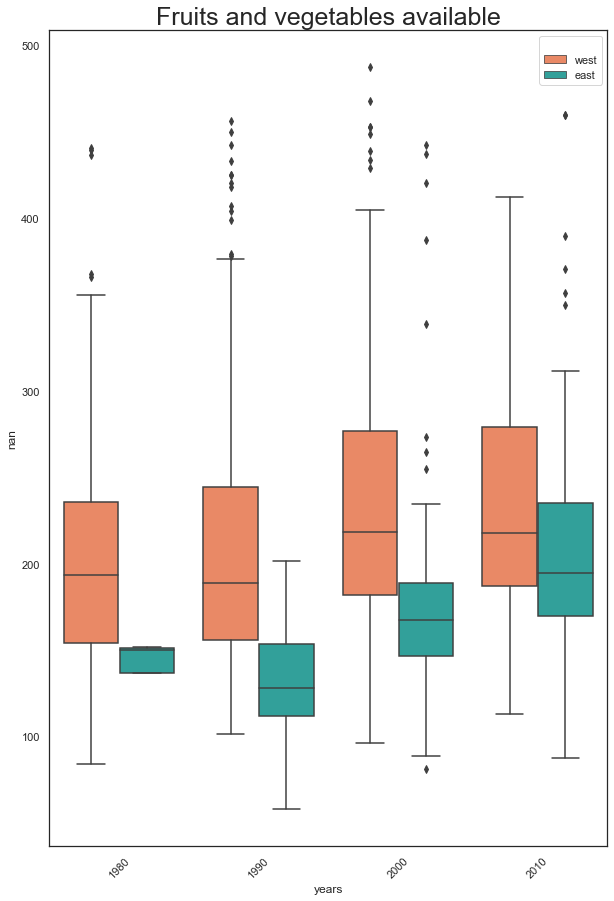

In [23]:
plot_boxplot_by_code(df_factors,'HFA_446')

### Boxplot 'HFA_427: Spirits consumed in pure alcohol, litres per capita, age 15+'

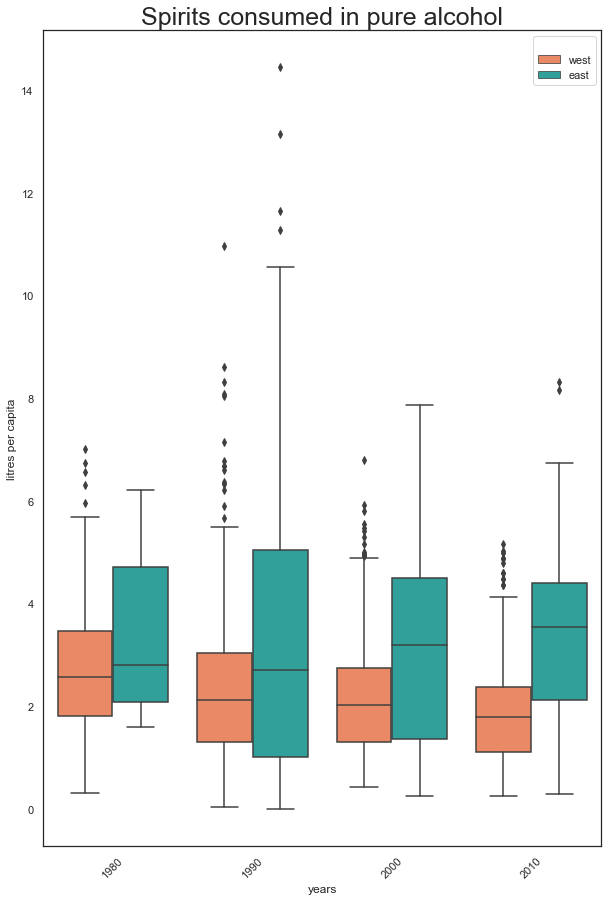

In [24]:
plot_boxplot_by_code(df_factors,'HFA_427')

### Boxlot - 'HFA_626: Total number of cigarettes consumed (in million pieces), per year'

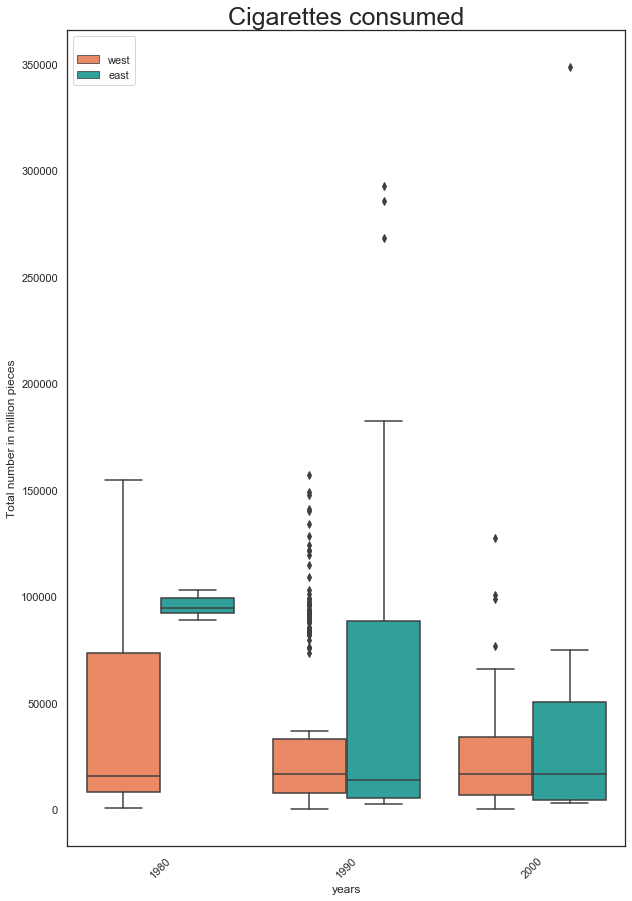

In [25]:
plot_boxplot_by_code(df_factors,'HFA_626')

###### There is a clear difference between East and West when it comes to availability of fresh fruits as well as smoking and tobacco consumption. Post-Soviet countries had and still have less fresh fruits and vegatbles available per person and they tend to smoke and drink more. In the further analysis I want to visualize a relationship between these factors and chosen diseases:
- 'HFA_446','HFA_101', 'Diseases of circulatory system vs fruits and vegetables available','avarage amount per person per year (kg)'
- 'HFA_626','HFA_137', 'Trachea/bronchus/lung cancer vs cigarettes consumed,'total number in million pieces'
- 'HFA_427','HFA_227', 'Diseases of digestive system vs spirits consumed in pure alcohol' , 'liters per capita'

#### Creating dataframe with chosen diseases

In [26]:
df_disease = df_perc[df_perc['code'].isin(['HFA_101','HFA_137', 'HFA_227'])]

### Plotting the disease vs factor:
#### 1. 'HFA_446','HFA_101', 'Diseases of circulatory system vs fruits and vegetables available','avarage amount per person per year (kg)'

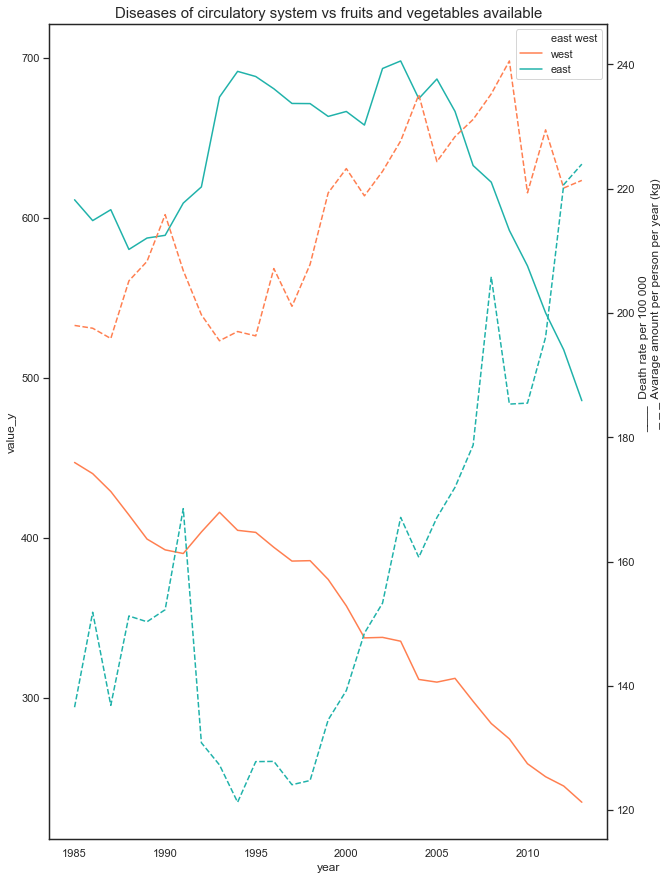

In [27]:
plot_lineplot_year_factor_disease(df_factors,
                                  df_disease,
                                  'HFA_446',
                                  'HFA_101',
                                  'Diseases of circulatory system vs fruits and vegetables available',
                                  'Avarage amount per person per year (kg)')


####   2. - 'HFA_626','HFA_137', 'Trachea/bronchus/lung cancer vs cigarettes consumed,'total number in million pieces'

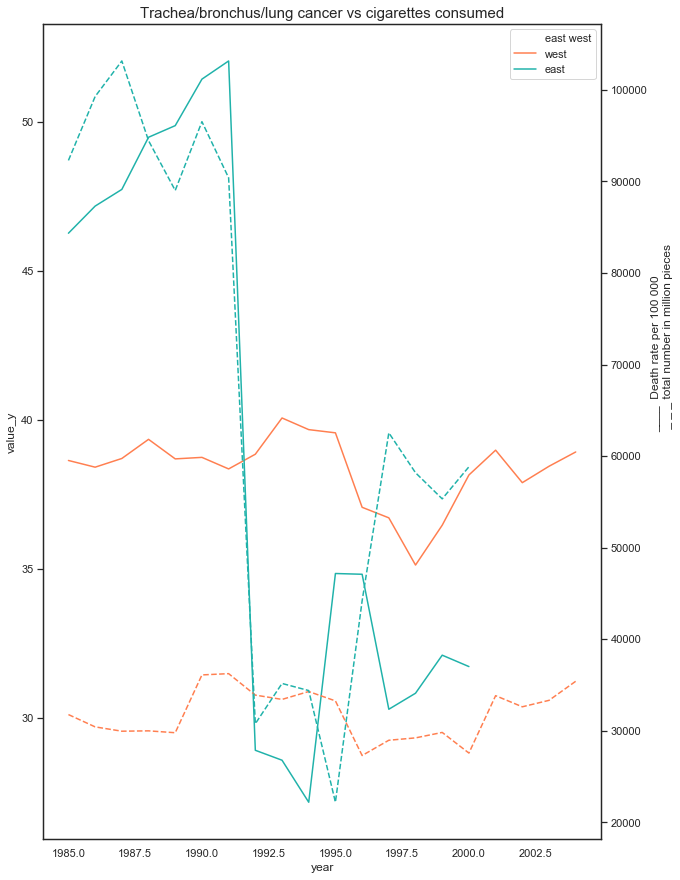

In [28]:
plot_lineplot_year_factor_disease(df_factors,
                                  df_disease,
                                  'HFA_626',
                                  'HFA_137',
                                  'Trachea/bronchus/lung cancer vs cigarettes consumed',
                                  'total number in million pieces')

#### 3. - 'HFA_427','HFA_227', 'Diseases of digestive system vs spirits consumed in pure alcohol' , 'liters per capita'

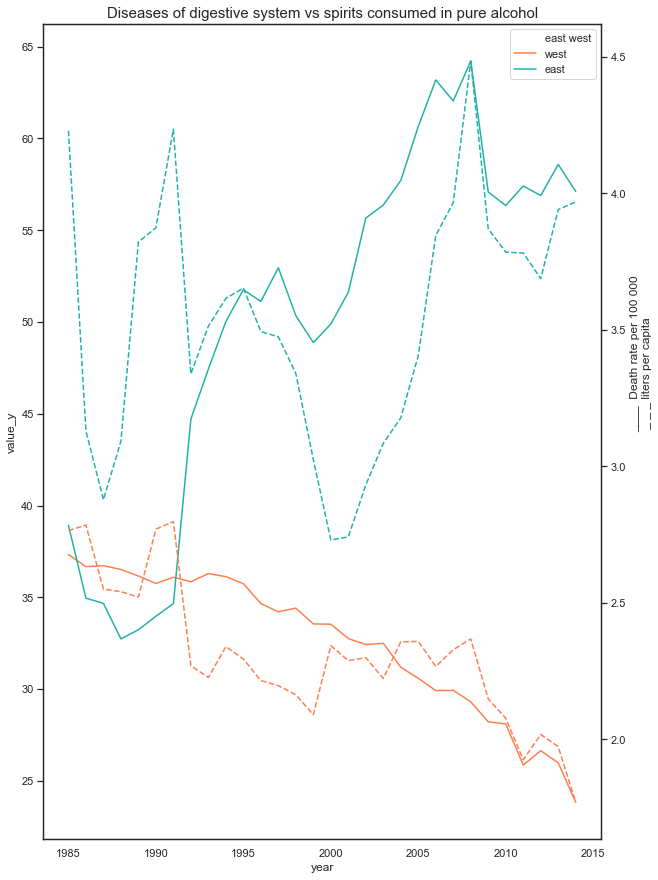

In [29]:
plot_lineplot_year_factor_disease(df_factors,
                                  df_disease,
                                  'HFA_427',
                                  'HFA_227',
                                  'Diseases of digestive system vs spirits consumed in pure alcohol', 
                                  'liters per capita')